In [1]:
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'png' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_players = pd.read_csv('Players.csv')
df_seasons_stat = pd.read_csv('Seasons_stats.csv').dropna(subset = ['Year'])
df_seasons_stat['Year'] = df_seasons_stat.Year.astype('int64')
del df_seasons_stat['Unnamed: 0']
df_seasons_stat.tail(30)[['Year','Player', 'OBPM', 'DBPM']]

,Year,Player,OBPM,DBPM
24661,2017,Deron Williams,0.2,-2.4
24662,2017,Deron Williams,1.0,-2.4
24663,2017,Deron Williams,-1.9,-2.6
24664,2017,Derrick Williams,-2.4,-1.8
24665,2017,Derrick Williams,-3.8,-1.4
24666,2017,Derrick Williams,-1.1,-2.1
24667,2017,Lou Williams,3.7,-3.0
24668,2017,Lou Williams,5.4,-3.2
24669,2017,Lou Williams,-0.1,-2.5
24670,2017,Marvin Williams,-0.3,0.5


# Лучшие игроки

In [3]:
df_stat_w_points = df_seasons_stat.drop_duplicates(subset=['Year','Player'])
df_stat_w_points['AGP'] = df_stat_w_points['PTS']/df_stat_w_points['G'] #AGP == 'Average Game Points'

### Определяем десятку лучших игроков по среднему кол-ву очков за игру

In [4]:
top_10_players = df_stat_w_points.groupby('Player').mean().sort_values(by='AGP', ascending=False)[:10][['AGP']]

In [5]:
top_10_players

,AGP
Player,
Wilt Chamberlain*,30.091686
Michael Jordan*,29.444797
LeBron James,27.121076
Kevin Durant,27.029466
Jerry West*,26.741316
George Gervin*,26.180839
Bob Pettit*,26.177270
Allen Iverson*,26.048326
Oscar Robertson*,25.526368


### Смотрим на графике

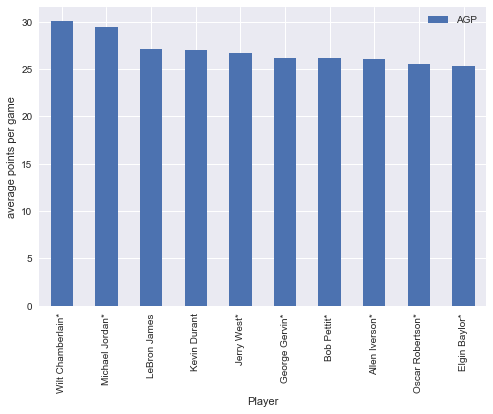

In [6]:
ax = top_10_players.plot(kind='bar')
ax.set_ylabel('average points per game');

### Как развивалась карьера лучших игроков со временем

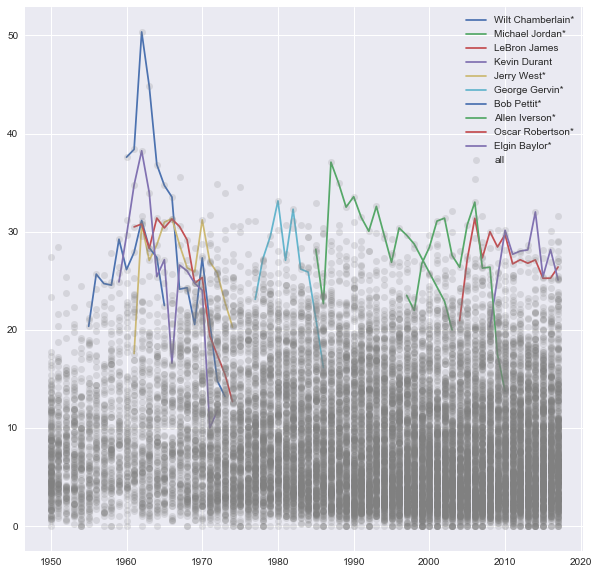

In [7]:
plt.figure(figsize=(10,10))
for player in top_10_players.index:
    plt.plot(df_stat_w_points.Year[df_stat_w_points.Player == player]\
             ,df_stat_w_points.AGP[df_stat_w_points.Player == player])
plt.plot(df_stat_w_points.Year,df_stat_w_points.AGP,'o', color='grey', alpha = 0.2)
plt.legend(top_10_players.index.append(pd.Index(['all'])));


### Тот же график в интерактиве

In [8]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [9]:
data = []
for player in top_10_players.index:
    trace = go.Scatter(
        x=df_stat_w_points.Year[df_stat_w_points.Player == player],
        y=df_stat_w_points.AGP[df_stat_w_points.Player == player],
        name=player
    )
    data.append(trace)
    
layout = {'title': 'Careers of top 10 players'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

### Имеют ли игроки первой десятки какие-то особые физические параметры

In [10]:
df_seasons_players = df_seasons_stat[['Year', 'Player']].drop_duplicates(subset=['Year', 'Player'])

In [11]:
season_players_with_params = pd.merge(df_seasons_players, df_players, on='Player').sort_values(by='Year')

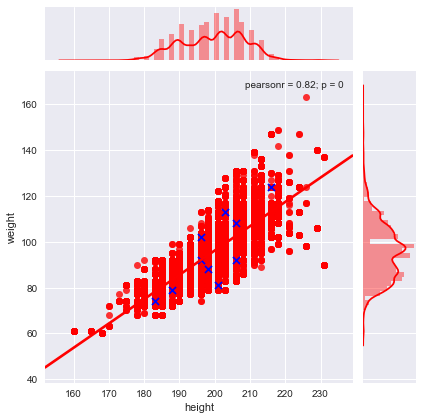

In [12]:
set2 = season_players_with_params\
.loc[season_players_with_params['Player'].isin(top_10_players.index)]\
.drop_duplicates(subset='Player')
pl = sns.jointplot(x=season_players_with_params.height, y=season_players_with_params.weight, color='r', kind='reg', label='all')
pl.x = set2.height
pl.y = set2.weight
pl.plot_joint(plt.scatter, marker='x', c='b', s=50, label='top 10');

явной связи успешности лидеров по очкам и их физических параметров не наблюдается

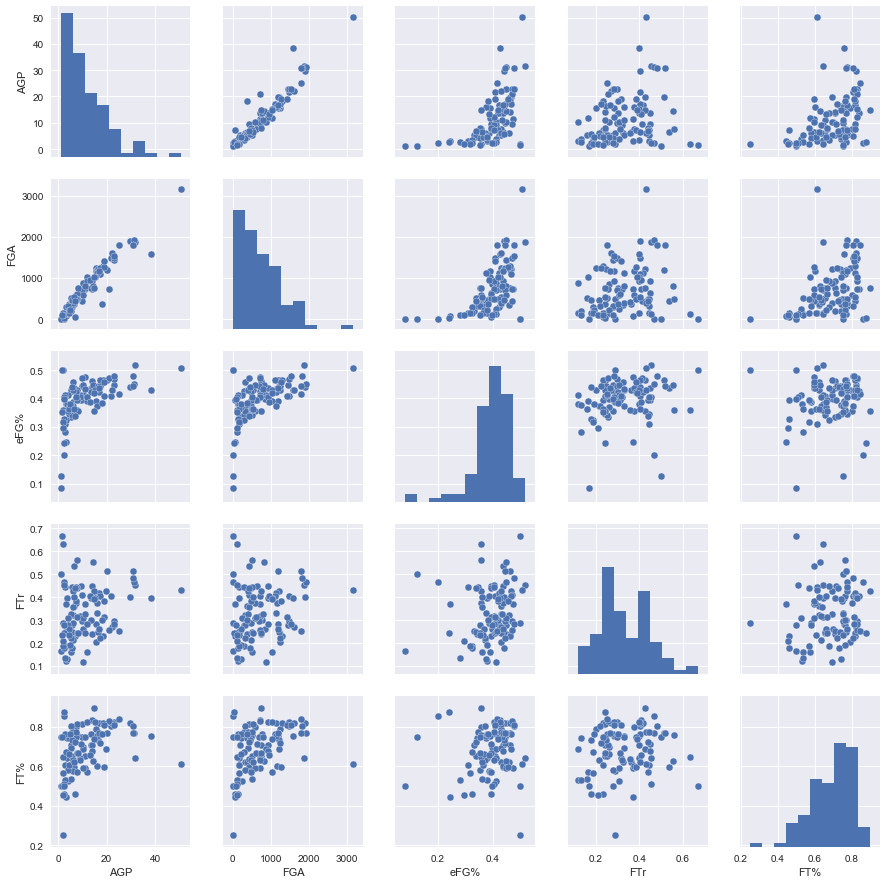

In [13]:
# до 1978 года не велся учет ряда метрик, поэтому в этом датафрейме данных взят ограниченный их набор

df_win_factors_pre_1978 = df_win_factors = df_seasons_stat\
                          .dropna(subset=['eFG%', 'FTr', 'FT%','WS','FGA'])\
                          [['Year', 'Player', 'Tm','eFG%', 'FTr', 'FT%', 'PTS', 'G', 'WS','FGA']]\
                          .drop_duplicates(subset=['Year', 'Player'])
df_win_factors_pre_1978['AGP'] = df_win_factors_pre_1978['PTS']/df_win_factors_pre_1978['G']

%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    df_win_factors_pre_1978[['AGP','FGA','eFG%', 'FTr', 'FT%']].loc[df_win_factors_pre_1978.Year==1962]);

# берем для отображения один год, чтобы уменьшить шумность данных

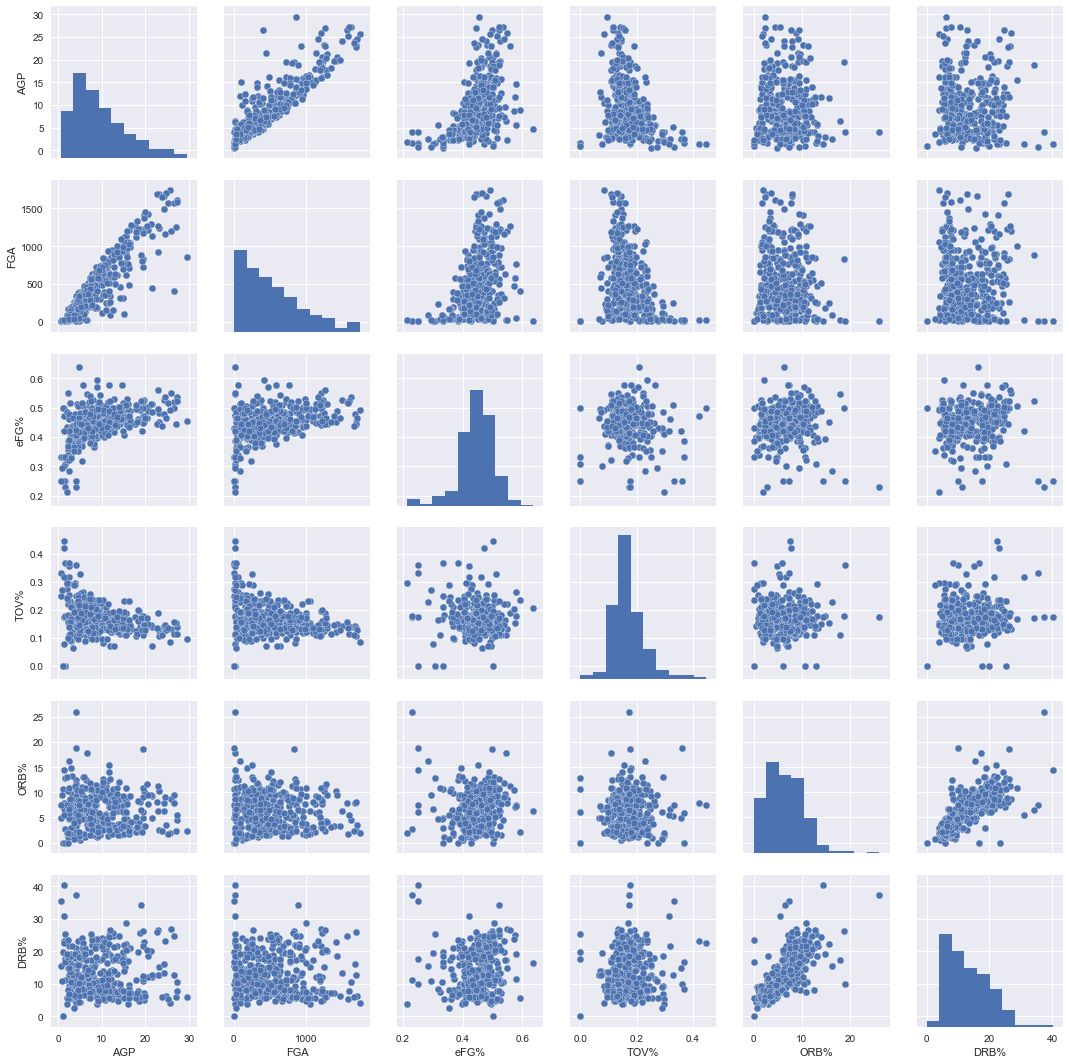

In [14]:
# расширенные параметры - главное отличие - добавлена метрика потерь мяча (TOV%)
df_win_factors = df_seasons_stat\
.dropna(subset=['eFG%', 'TOV', 'ORB%', 'DRB%', 'FTr'])\
[['Year', 'Player', 'Tm','eFG%', 'TOV', 'ORB%', 'DRB%', 'FTr', 'FGA', 'FTA', 'PTS', 'G']]
#TOV% = TOV / (FGA + 0.44 * FTA + TOV)
df_win_factors['TOV%'] = df_win_factors.TOV/(df_win_factors.FGA + 0.44*df_win_factors.FTA + df_win_factors.TOV)
df_win_factors['AGP'] = df_win_factors['PTS']/df_win_factors['G']
df_win_factors.drop_duplicates(subset=['Year', 'Player'])
df_win_factors = df_win_factors[df_win_factors['eFG%'] !=0]
df_win_factors = df_win_factors[df_win_factors['eFG%'] !=1]


sns_plot = sns.pairplot(
    df_win_factors[['AGP', 'FGA', 'eFG%', 'TOV%','ORB%', 'DRB%']].loc[df_win_factors.Year==1978]);

Из приведенных графиков видно, что кол-во очков, зарабатываемых игроком (AGP), более всего связана с кол-вом бросков (FGA), при этом существует обратная зависимость с кол-вом потерь мяча (TOV%) 

### Посмотрим, есть ли отличия в стиле лучших игроков по подбору мяча - в защите (Defensive Rebounds, DRB%) или в нападении (Ofeensive Rebounds, ORB%)

In [76]:
offence_defence = df_seasons_stat.dropna(subset=['ORB%', 'DRB%']).drop_duplicates(subset=['Year', 'Player'])
top_offence_defence = offence_defence.loc[offence_defence.Player.isin(top_10_players.index)]
mean_ORB = top_offence_defence['ORB%'].mean()
mean_DRB = top_offence_defence['DRB%'].mean()
top_offence_defence['nORB%'] = top_offence_defence['ORB%'] - mean_ORB # центрируем данные для наглядности
top_offence_defence['nDRB%'] = top_offence_defence['DRB%'] - mean_DRB # центрируем данные для наглядности

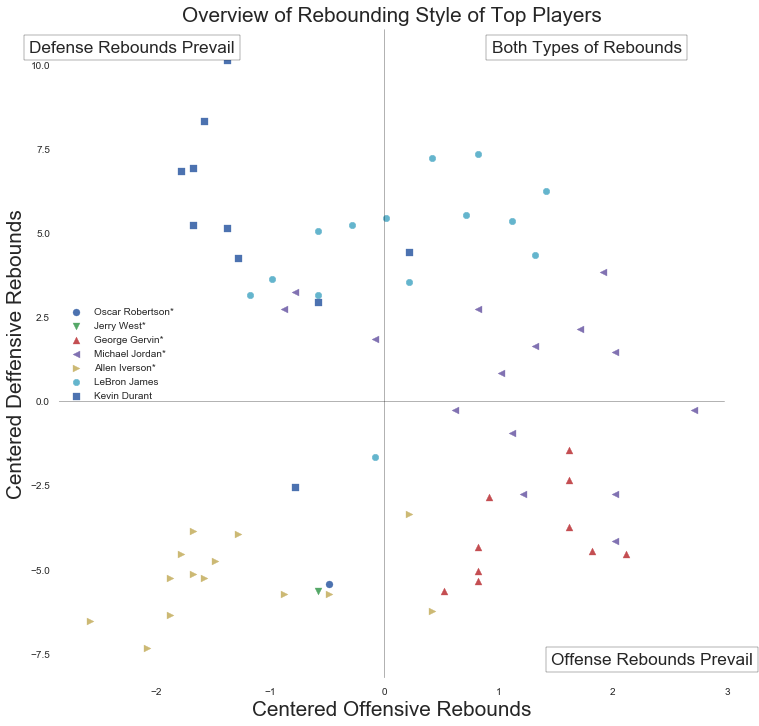

In [75]:
markers = matplotlib.markers.MarkerStyle.filled_markers
plt.figure(figsize=(12,12))
series = []
series_names = []
for player, m in zip(top_offence_defence.Player.unique(), markers):
    df = top_offence_defence.loc[top_offence_defence['Player'] == player]
    s = plt.scatter(df['nORB%'], df['nDRB%'], marker=m)
    series.append(s)
    series_names.append(player)
    
ax = plt.gca()
ax.set_facecolor('white')

plt.legend(tuple(series), tuple(series_names), loc='center left')


plt.annotate(s="", xy=(plt.xlim()[0], 0), 
             xytext=(plt.xlim()[1], 0), 
             arrowprops=dict(arrowstyle="-"))

plt.annotate(s="", xy=(0, plt.ylim()[0]), 
             xytext=(0, plt.ylim()[1]), 
             arrowprops=dict(arrowstyle="-"))

plt.annotate(s="Both Types of Rebounds", xy=(plt.xlim()[1],plt.ylim()[1]),
             textcoords="offset points", xytext=(-140, -20),
             va="center", ha="center", size="x-large",
             bbox=dict(boxstyle="square", fc="w"))

plt.annotate(s="Offense Rebounds Prevail", xy=(plt.xlim()[1],plt.ylim()[0]),
             textcoords="offset points", xytext=(-75, 20),
             va="center", ha="center", size="x-large",
             bbox=dict(boxstyle="square", fc="w"))

plt.annotate(s="Defense Rebounds Prevail", xy=(plt.xlim()[0],plt.ylim()[1]),
             textcoords="offset points", xytext=(75, -20),
             va="center", ha="center", size="x-large",
             bbox=dict(boxstyle="square", fc="w"))

plt.xlabel("Centered Offensive Rebounds", size="xx-large")
plt.ylabel("Centered Deffensive Rebounds", size="xx-large")
plt.title('Overview of Rebounding Style of Top Players', size="xx-large");

Из приведенного графика видно, что в целом для игроков свойственны определенные типы подборов мяча - больше в защите, либо в нападении

# Изменение статистических параметров роста игроков по годам

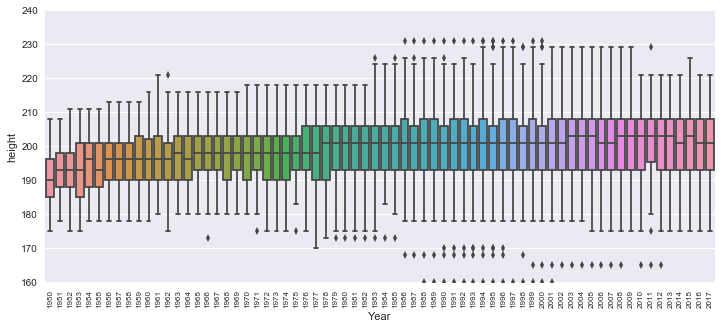

In [12]:
plt.figure(figsize=(12, 5))
plt.ylim(160, 240)
plt.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=90);
pl_height_over_years = sns.boxplot(x='Year', y='height', data=season_players_with_params);

Из графика видно, что имеется тенденция к увеличению среднего роста игроков NBA с течением времени